# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [46]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [47]:
# Set base url and units variables, and combine them to get the query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Create empty lists to store the data for each field
city_id_list = []
city_name_list = []
country_list = []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_speed_list = []

# Loop through cities
for city in cities:
    
    # Get the JSON response from the OpenWeather API
    response_json = requests.get(query_url + city).json()
    
    # Start the error handling
    # Retrieve the items for each field and append them to the empty lists  
    try:
        
        city_id = response_json['id']
        city_id_list.append(city_id)
            
        city_name = response_json['name']
        city_name_list.append(city_name)
        
        country_name = response_json['sys']['country']
        country_list.append(country_name)

        lng = response_json['coord']['lon']
        lng_list.append(lng)

        lat = response_json['coord']['lat']
        lat_list.append(lat)

        temp = response_json['main']['temp']
        temp_list.append(temp)
        humidity = response_json['main']['humidity']
        humidity_list.append(humidity)

        clouds = response_json['clouds']['all']
        clouds_list.append(clouds)

        wind_speed = response_json['wind']['speed']
        wind_speed_list.append(wind_speed)
    
        print(f"City Name: {city}, City ID: {city_id}")
    
    # Print error message and move on to the next city if there is an error
    except:
        
        print("That record does not exist, searching for next record...")

City Name: bluff, City ID: 2206939
City Name: na klang, City ID: 1604654
City Name: rikitea, City ID: 4030556
That record does not exist, searching for next record...
City Name: husavik, City ID: 2629833
City Name: margate, City ID: 2643044
City Name: hunterville, City ID: 2189630
City Name: ler, City ID: 371466
City Name: albany, City ID: 5106841
City Name: port alfred, City ID: 964432
City Name: mar del plata, City ID: 3430863
City Name: effingham, City ID: 4193042
That record does not exist, searching for next record...
City Name: atuona, City ID: 4020109
City Name: jamestown, City ID: 5122534
That record does not exist, searching for next record...
City Name: springdale, City ID: 4132093
City Name: cumberland, City ID: 4462716
City Name: camacha, City ID: 2270385
City Name: thompson, City ID: 6165406
City Name: kapaa, City ID: 5848280
City Name: constitucion, City ID: 3893726
City Name: korla, City ID: 1529376
City Name: cidreira, City ID: 3466165
City Name: egyek, City ID: 721208


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [48]:
# read the cities.csv to create dataframe, previous cells are not needed to be executed as long as cities.csv was created
cities = pd.read_csv("output_data/cities.csv", encoding="utf-8")
cities.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


In [8]:
# Convert the data into a dataframe
cities_df = pd.DataFrame({"City ID": city_id_list, "City": city_name_list, "Country": country_list, "Lat": lat_list, "Lng": lng_list,
                         "Temperature": temp_list, "Humidity": humidity_list, "Clouds": clouds_list,
                         "Wind Speed": wind_speed_list})
cities_df.head()

,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
0,3929493,San Juan Bautista,PE,-14.0108,-75.7358,60.17,47,70,3.89
1,1282256,Hithadhoo,MV,-0.6000,73.0833,83.32,67,99,6.62
2,2022572,Khatanga,RU,71.9667,102.5000,48.79,48,100,13.00
3,4030556,Rikitea,PF,-23.1203,-134.9692,74.03,76,14,2.89
4,3471451,Arraial do Cabo,BR,-22.9661,-42.0278,78.66,53,0,14.97


In [49]:
# Export to .csv file
cities_df.to_csv("output_data/city_weather.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#  Get the indices of cities that have humidity over 100%.


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

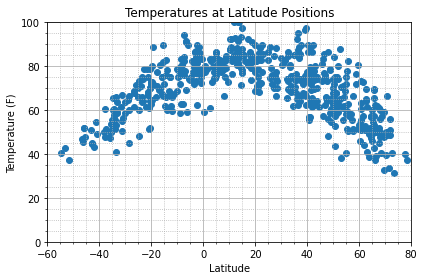

<Figure size 432x288 with 0 Axes>

In [50]:
x_values = cities_df["Lat"]
y_values = cities_df["Temperature"]

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(0, 100)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/lat_temp.png")

## Latitude vs. Humidity Plot

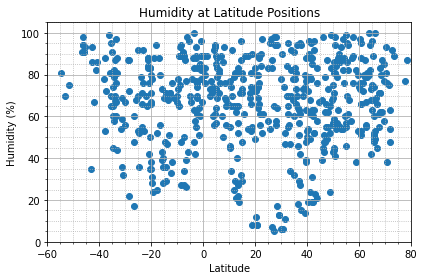

<Figure size 432x288 with 0 Axes>

In [51]:
x_values = cities_df["Lat"]
y_values = cities_df["Humidity"]

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/lat_humid.png")

## Latitude vs. Cloudiness Plot

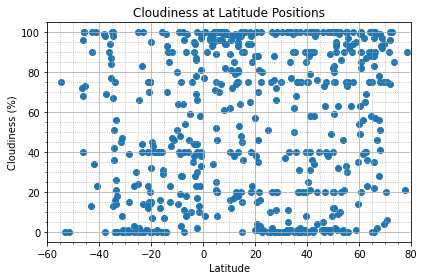

<Figure size 432x288 with 0 Axes>

In [52]:
x_values = cities_df["Lat"]
y_values = cities_df["Clouds"]

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/lat_clouds.png")

## Latitude vs. Wind Speed Plot

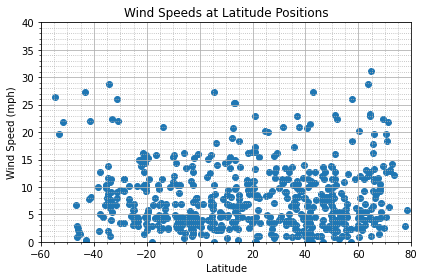

<Figure size 432x288 with 0 Axes>

In [53]:
x_values = cities_df["Lat"]
y_values = cities_df["Wind Speed"]

plt.scatter(x_values,y_values)
plt.title('Wind Speeds at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/lat_wind.png")

## Linear Regression

In [54]:
#OPTIONAL: Create a function to create Linear Regression plots
def linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    correlation = st.pearsonr(x_values, y_values)
    
    print(f"r-squared: {rvalue**2}")
    print(f"Correlation: {correlation}")
    print(f"Line: {line_eq}")

    return regress_values, line_eq

In [55]:
# Create Northern and Southern Hemisphere DataFrames
mask = cities_df['Lat'] > 0
northern_hemisphere = cities_df[mask]
southern_hemisphere = cities_df[~mask]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

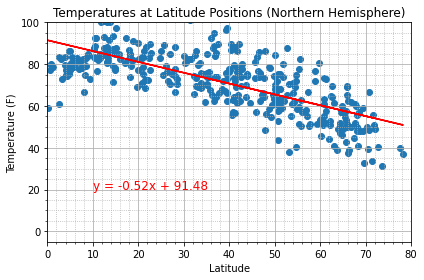

<Figure size 432x288 with 0 Axes>

In [56]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(-5, 100)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/nh_lat_temp_regression.png")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

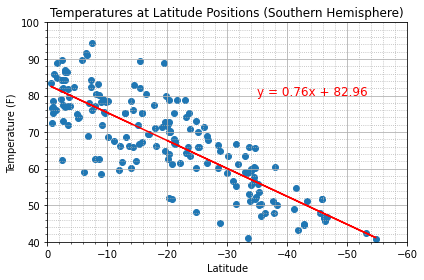

<Figure size 432x288 with 0 Axes>

In [57]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(40, 100)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/sh_lat_temp_regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

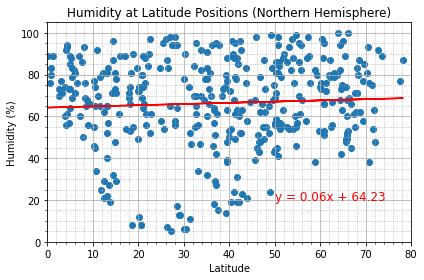

<Figure size 432x288 with 0 Axes>

In [58]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/nh_lat_humid_regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

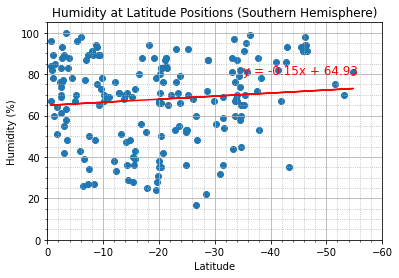

<Figure size 432x288 with 0 Axes>

In [59]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()
plt.savefig("Images/sh_lat_humid_regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

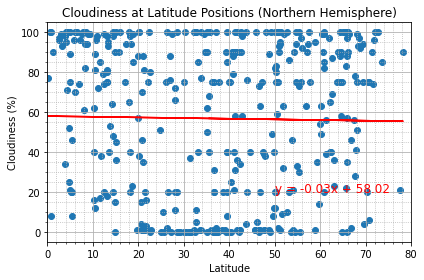

<Figure size 432x288 with 0 Axes>

In [60]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/nh_lat_clouds_regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

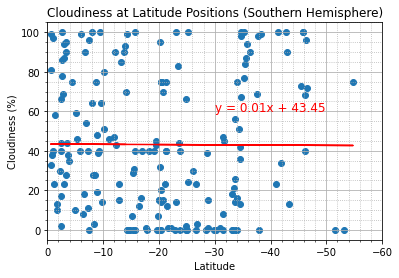

<Figure size 432x288 with 0 Axes>

In [61]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()
plt.savefig("Images/sh_lat_clouds_regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

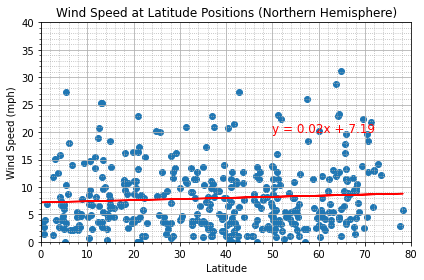

<Figure size 432x288 with 0 Axes>

In [62]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/nh_lat_wind_regression.png")


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

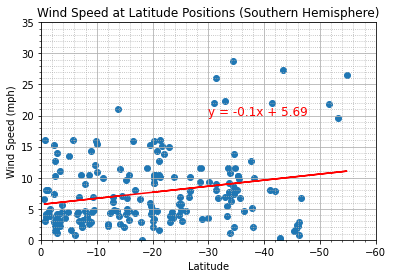

<Figure size 432x288 with 0 Axes>

In [63]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 35)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()
plt.savefig("Images/sh_lat_wind_regression.png")